# Compare signal weightings

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import numpy as np
import os
import sys
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
sns.set()

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

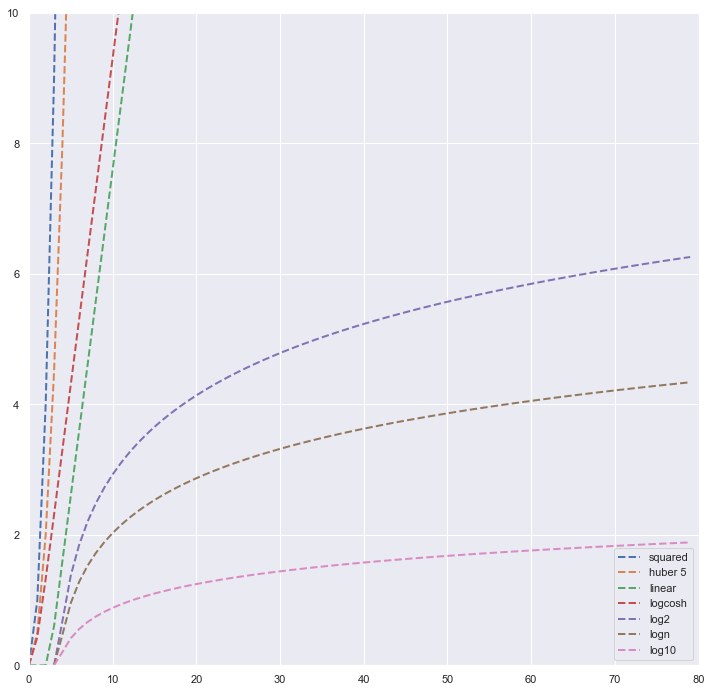

In [30]:
from keras import backend as K
from keras import losses as k_losses
from scipy.special import huber as cp_huber

x = np.arange(80)

squared = lambda x: np.square(x)
huber = lambda x, delta: cp_huber(delta, x)
linear = lambda x, zp: np.max((np.zeros(x.shape), x - zp), axis=0)
logcosh = lambda x, k: K.eval(x + K.softplus(-k * x) - K.log(k))
log2 = lambda x, zp: np.max((np.zeros(x.shape), np.log2(x - zp)), axis=0)
logn = lambda x, zp: np.max((np.zeros(x.shape), np.log(x - zp)), axis=0)
log10 = lambda x, zp: np.max((np.zeros(x.shape), np.log10(x - zp)), axis=0)

linear(x, 1)

fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(x, squared(x), '--', linewidth=2, label='squared')
ax.plot(x, huber(x, 5), '--', linewidth=2, label='huber 5')
ax.plot(x, linear(x, 120 * 0.02), '--', linewidth=2, label='linear')
ax.plot(x, logcosh(K.variable(x), K.variable(2)), '--', linewidth=2, label='logcosh')
ax.plot(x, log2(x, 120 * 0.02), '--', linewidth=2, label='log2')
ax.plot(x, logn(x, 120 * 0.02), '--', linewidth=2, label='logn')
ax.plot(x, log10(x, 120 * 0.02), '--', linewidth=2, label='log10')
ax.legend(loc='lower right')
ax.set_ylim(0, 10)
ax.set_xlim(0, 80)
plt.show()